In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import re
from bs4 import BeautifulSoup

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('train.csv')

In [3]:
df.head()

,id,qid1,qid2,question1,question2,is_duplicate
0,0,1,2,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0
1,1,3,4,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0
2,2,5,6,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0
3,3,7,8,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,0
4,4,9,10,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 404290 entries, 0 to 404289
Data columns (total 6 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            404290 non-null  int64 
 1   qid1          404290 non-null  int64 
 2   qid2          404290 non-null  int64 
 3   question1     404289 non-null  object
 4   question2     404288 non-null  object
 5   is_duplicate  404290 non-null  int64 
dtypes: int64(4), object(2)
memory usage: 18.5+ MB


In [5]:
df.shape

(404290, 6)

In [6]:
df = df.sample(50000,random_state=42)

In [7]:
df.isnull().sum()

id              0
qid1            0
qid2            0
question1       0
question2       0
is_duplicate    0
dtype: int64

In [8]:
df.duplicated().sum()

0

0    31547
1    18453
Name: is_duplicate, dtype: int64
0    63.094
1    36.906
Name: is_duplicate, dtype: float64


<AxesSubplot:>

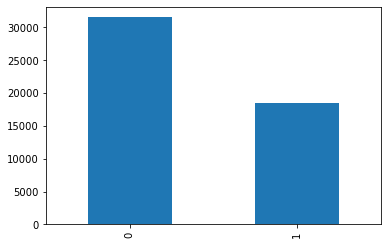

In [9]:
print(df['is_duplicate'].value_counts())
print((df['is_duplicate'].value_counts()/df['is_duplicate'].count())*100)

df['is_duplicate'].value_counts().plot(kind='bar')

**Text PreProcessing**





In [10]:
def preprocess(q):

    q = str(q).lower().strip()

    # Replace certain special characters with their string equivalents
    q = q.replace('%', ' percent')
    q = q.replace('$', ' dollar ')
    q = q.replace('₹', ' rupee ')
    q = q.replace('€', ' euro ')
    q = q.replace('@', ' at ')

    contractions = {
    "ain't": "am not",
    "aren't": "are not",
    "can't": "can not",
    "can't've": "can not have",
    "'cause": "because",
    "could've": "could have",
    "couldn't": "could not",
    "couldn't've": "could not have",
    "didn't": "did not",
    "doesn't": "does not",
    "don't": "do not",
    "hadn't": "had not",
    "hadn't've": "had not have",
    "hasn't": "has not",
    "haven't": "have not",
    "he'd": "he would",
    "he'd've": "he would have",
    "he'll": "he will",
    "he'll've": "he will have",
    "he's": "he is",
    "how'd": "how did",
    "how'd'y": "how do you",
    "how'll": "how will",
    "how's": "how is",
    "i'd": "i would",
    "i'd've": "i would have",
    "i'll": "i will",
    "i'll've": "i will have",
    "i'm": "i am",
    "i've": "i have",
    "isn't": "is not",
    "it'd": "it would",
    "it'd've": "it would have",
    "it'll": "it will",
    "it'll've": "it will have",
    "it's": "it is",
    "let's": "let us",
    "ma'am": "madam",
    "mayn't": "may not",
    "might've": "might have",
    "mightn't": "might not",
    "mightn't've": "might not have",
    "must've": "must have",
    "mustn't": "must not",
    "mustn't've": "must not have",
    "needn't": "need not",
    "needn't've": "need not have",
    "o'clock": "of the clock",
    "oughtn't": "ought not",
    "oughtn't've": "ought not have",
    "shan't": "shall not",
    "sha'n't": "shall not",
    "shan't've": "shall not have",
    "she'd": "she would",
    "she'd've": "she would have",
    "she'll": "she will",
    "she'll've": "she will have",
    "she's": "she is",
    "should've": "should have",
    "shouldn't": "should not",
    "shouldn't've": "should not have",
    "so've": "so have",
    "so's": "so as",
    "that'd": "that would",
    "that'd've": "that would have",
    "that's": "that is",
    "there'd": "there would",
    "there'd've": "there would have",
    "there's": "there is",
    "they'd": "they would",
    "they'd've": "they would have",
    "they'll": "they will",
    "they'll've": "they will have",
    "they're": "they are",
    "they've": "they have",
    "to've": "to have",
    "wasn't": "was not",
    "we'd": "we would",
    "we'd've": "we would have",
    "we'll": "we will",
    "we'll've": "we will have",
    "we're": "we are",
    "we've": "we have",
    "weren't": "were not",
    "what'll": "what will",
    "what'll've": "what will have",
    "what're": "what are",
    "what's": "what is",
    "what've": "what have",
    "when's": "when is",
    "when've": "when have",
    "where'd": "where did",
    "where's": "where is",
    "where've": "where have",
    "who'll": "who will",
    "who'll've": "who will have",
    "who's": "who is",
    "who've": "who have",
    "why's": "why is",
    "why've": "why have",
    "will've": "will have",
    "won't": "will not",
    "won't've": "will not have",
    "would've": "would have",
    "wouldn't": "would not",
    "wouldn't've": "would not have",
    "y'all": "you all",
    "y'all'd": "you all would",
    "y'all'd've": "you all would have",
    "y'all're": "you all are",
    "y'all've": "you all have",
    "you'd": "you would",
    "you'd've": "you would have",
    "you'll": "you will",
    "you'll've": "you will have",
    "you're": "you are",
    "you've": "you have",
    "'ve": " have",
    "'re": " are",
    "'ll": " will",
    "n't": " not",
    "what's": " what is",
    "it's": " it is",
    }

    q_decontracted = []

    for word in q.split():
        if word in contractions:
            word = contractions[word]

        q_decontracted.append(word)

    q = ' '.join(q_decontracted)


    # Removing HTML tags
    q = BeautifulSoup(q)
    q = q.get_text()

    # Remove punctuations
    pattern = re.compile('\W')
    q = re.sub(pattern, ' ', q).strip()


    return q

In [11]:
preprocess("I've already! wasn't <b>done</b>?")

'i have already  was not done'

In [12]:
df['question1'] = df['question1'].apply(preprocess)
df['question2'] = df['question2'].apply(preprocess)

In [13]:
import nltk
from nltk.stem import PorterStemmer, WordNetLemmatizer
from nltk.tokenize import word_tokenize

# Download necessary NLTK data files
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('omw-1.4')

# Initialize stemmer and lemmatizer
stemmer = PorterStemmer()
lemmatizer = WordNetLemmatizer()




[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Arinj\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Arinj\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\Arinj\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [14]:

def apply_stemming_and_lemmatization(sentence):

    # Tokenize the sentence into words
    words = word_tokenize(sentence)

    # Apply stemming and lemmatization
    modified_words = []
    for word in words:

        lemmatized_word = lemmatizer.lemmatize(word)
        stemmed_word = stemmer.stem(lemmatized_word)
        # Combine stemmed and lemmatized words

        modified_words.append(stemmed_word)

    # Join the modified words into a single sentence
    modified_sentence = ' '.join(modified_words)

    return modified_sentence


In [15]:
sentence = "The quick brown foxes are jumping over the lazy dogs easily."
apply_stemming_and_lemmatization(sentence)

'the quick brown fox are jump over the lazi dog easili .'

In [16]:
df['question1'] = df['question1'].apply(apply_stemming_and_lemmatization)
df['question2'] = df['question2'].apply(apply_stemming_and_lemmatization)

In [17]:
df.head(5)

,id,qid1,qid2,question1,question2,is_duplicate
8067,8067,15738,15739,how do i play pokémon go in korea,how do i play pokémon go in china,0
368101,368101,12736,104117,what are some of the best side dish for crab cake,what are some good side dish for buffalo chicken,0
70497,70497,121486,121487,which is more advis and better materi for a cr...,what is the best server setup for buddypress,0
226567,226567,254474,258192,how do i improv logic program skill,how can i improv my logic skill for program,1
73186,73186,48103,3062,how close we are to see 3rd world war,how close is a world war iii,1


# Feature Engineering

In [18]:
df['q1_len'] = df['question1'].str.len()
df['q2_len'] = df['question2'].str.len()

In [19]:
df['q1_num_words'] = df['question1'].apply(lambda row: len(row.split(" ")))
df['q2_num_words'] = df['question2'].apply(lambda row: len(row.split(" ")))

In [20]:
def common_words(row):
    w1 = set(map(lambda word: word.lower().strip(), row['question1'].split(" ")))
    w2 = set(map(lambda word: word.lower().strip(), row['question2'].split(" ")))
    return len(w1 & w2)

In [21]:
df['word_common'] = df.apply(common_words, axis=1)


In [22]:
def total_words(row):
    w1 = set(map(lambda word: word.lower().strip(), row['question1'].split(" ")))
    w2 = set(map(lambda word: word.lower().strip(), row['question2'].split(" ")))
    return (len(w1) + len(w2))

In [23]:
df['word_total'] = df.apply(total_words, axis=1)
df.head()

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words,word_common,word_total
8067,8067,15738,15739,how do i play pokémon go in korea,how do i play pokémon go in china,0,33,33,8,8,7,16
368101,368101,12736,104117,what are some of the best side dish for crab cake,what are some good side dish for buffalo chicken,0,49,48,11,9,6,20
70497,70497,121486,121487,which is more advis and better materi for a cr...,what is the best server setup for buddypress,0,84,44,16,8,2,24
226567,226567,254474,258192,how do i improv logic program skill,how can i improv my logic skill for program,1,35,43,7,9,6,16
73186,73186,48103,3062,how close we are to see 3rd world war,how close is a world war iii,1,37,28,9,7,4,16


In [24]:
df['word_share'] = round(df['word_common']/df['word_total'],2)
df.head()

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words,word_common,word_total,word_share
8067,8067,15738,15739,how do i play pokémon go in korea,how do i play pokémon go in china,0,33,33,8,8,7,16,0.44
368101,368101,12736,104117,what are some of the best side dish for crab cake,what are some good side dish for buffalo chicken,0,49,48,11,9,6,20,0.30
70497,70497,121486,121487,which is more advis and better materi for a cr...,what is the best server setup for buddypress,0,84,44,16,8,2,24,0.08
226567,226567,254474,258192,how do i improv logic program skill,how can i improv my logic skill for program,1,35,43,7,9,6,16,0.38
73186,73186,48103,3062,how close we are to see 3rd world war,how close is a world war iii,1,37,28,9,7,4,16,0.25


In [25]:
from nltk.corpus import stopwords
nltk.download('stopwords')
def fetch_token_features(row):

    q1 = row['question1']
    q2 = row['question2']

    SAFE_DIV = 0.0001

    STOP_WORDS = stopwords.words("english")

    token_features = [0.0]*8

    # Converting the Sentence into Tokens:
    q1_tokens = q1.split()
    q2_tokens = q2.split()

    if len(q1_tokens) == 0 or len(q2_tokens) == 0:
        return token_features

    # Get the non-stopwords in Questions
    q1_words = set([word for word in q1_tokens if word not in STOP_WORDS])
    q2_words = set([word for word in q2_tokens if word not in STOP_WORDS])

    #Get the stopwords in Questions
    q1_stops = set([word for word in q1_tokens if word in STOP_WORDS])
    q2_stops = set([word for word in q2_tokens if word in STOP_WORDS])

    # Get the common non-stopwords from Question pair
    common_word_count = len(q1_words.intersection(q2_words))

    # Get the common stopwords from Question pair
    common_stop_count = len(q1_stops.intersection(q2_stops))

    # Get the common Tokens from Question pair
    common_token_count = len(set(q1_tokens).intersection(set(q2_tokens)))


    token_features[0] = common_word_count / (min(len(q1_words), len(q2_words)) + SAFE_DIV)
    token_features[1] = common_word_count / (max(len(q1_words), len(q2_words)) + SAFE_DIV)
    token_features[2] = common_stop_count / (min(len(q1_stops), len(q2_stops)) + SAFE_DIV)
    token_features[3] = common_stop_count / (max(len(q1_stops), len(q2_stops)) + SAFE_DIV)
    token_features[4] = common_token_count / (min(len(q1_tokens), len(q2_tokens)) + SAFE_DIV)
    token_features[5] = common_token_count / (max(len(q1_tokens), len(q2_tokens)) + SAFE_DIV)

    # Last word of both question is same or not
    token_features[6] = int(q1_tokens[-1] == q2_tokens[-1])

    # First word of both question is same or not
    token_features[7] = int(q1_tokens[0] == q2_tokens[0])

    return token_features

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Arinj\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [26]:
token_features = df.apply(fetch_token_features, axis=1)

df["cwc_min"]       = list(map(lambda x: x[0], token_features))
df["cwc_max"]       = list(map(lambda x: x[1], token_features))
df["csc_min"]       = list(map(lambda x: x[2], token_features))
df["csc_max"]       = list(map(lambda x: x[3], token_features))
df["ctc_min"]       = list(map(lambda x: x[4], token_features))
df["ctc_max"]       = list(map(lambda x: x[5], token_features))
df["last_word_eq"]  = list(map(lambda x: x[6], token_features))
df["first_word_eq"] = list(map(lambda x: x[7], token_features))

In [27]:
df.head()

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words,...,word_total,word_share,cwc_min,cwc_max,csc_min,csc_max,ctc_min,ctc_max,last_word_eq,first_word_eq
8067,8067,15738,15739,how do i play pokémon go in korea,how do i play pokémon go in china,0,33,33,8,8,...,16,0.44,0.749981,0.749981,0.999975,0.999975,0.874989,0.874989,0.0,1.0
368101,368101,12736,104117,what are some of the best side dish for crab cake,what are some good side dish for buffalo chicken,0,49,48,11,9,...,20,0.30,0.399992,0.399992,0.999975,0.666656,0.666659,0.545450,0.0,1.0
70497,70497,121486,121487,which is more advis and better materi for a cr...,what is the best server setup for buddypress,0,84,44,16,8,...,24,0.08,0.000000,0.000000,0.499988,0.249997,0.249997,0.124999,0.0,0.0
226567,226567,254474,258192,how do i improv logic program skill,how can i improv my logic skill for program,1,35,43,7,9,...,16,0.38,0.999975,0.999975,0.666644,0.399992,0.857131,0.666659,0.0,1.0
73186,73186,48103,3062,how close we are to see 3rd world war,how close is a world war iii,1,37,28,9,7,...,16,0.25,0.749981,0.599988,0.333322,0.249994,0.571420,0.444440,0.0,1.0


In [28]:
!pip install distance

In [29]:
import distance


def fetch_length_features(row):
    q1 = row['question1']
    q2 = row['question2']

    length_features = [0.0] * 3

    # Converting the Sentence into Tokens:
    q1_tokens = q1.split()
    q2_tokens = q2.split()

    if len(q1_tokens) == 0 or len(q2_tokens) == 0:
        return length_features

    # Absolute length features
    length_features[0] = abs(len(q1_tokens) - len(q2_tokens))

    # Average Token Length of both Questions
    length_features[1] = (len(q1_tokens) + len(q2_tokens)) / 2

    strs = list(distance.lcsubstrings(q1, q2))
    if strs:
        length_features[2] = len(strs[0]) / (min(len(q1), len(q2)) + 1)
    else:
        length_features[2] = 0.0

    return length_features



In [30]:
# df.head()

In [31]:
length_features = df.apply(fetch_length_features, axis=1)

df['abs_len_diff'] = list(map(lambda x: x[0], length_features))
df['mean_len'] = list(map(lambda x: x[1], length_features))
df['longest_substr_ratio'] = list(map(lambda x: x[2], length_features))

In [32]:
df.head()

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words,...,cwc_max,csc_min,csc_max,ctc_min,ctc_max,last_word_eq,first_word_eq,abs_len_diff,mean_len,longest_substr_ratio
8067,8067,15738,15739,how do i play pokémon go in korea,how do i play pokémon go in china,0,33,33,8,8,...,0.749981,0.999975,0.999975,0.874989,0.874989,0.0,1.0,0.0,8.0,0.823529
368101,368101,12736,104117,what are some of the best side dish for crab cake,what are some good side dish for buffalo chicken,0,49,48,11,9,...,0.399992,0.999975,0.666656,0.666659,0.545450,0.0,1.0,2.0,10.0,0.306122
70497,70497,121486,121487,which is more advis and better materi for a cr...,what is the best server setup for buddypress,0,84,44,16,8,...,0.000000,0.499988,0.249997,0.249997,0.124999,0.0,0.0,8.0,12.0,0.111111
226567,226567,254474,258192,how do i improv logic program skill,how can i improv my logic skill for program,1,35,43,7,9,...,0.999975,0.666644,0.399992,0.857131,0.666659,0.0,1.0,2.0,8.0,0.277778
73186,73186,48103,3062,how close we are to see 3rd world war,how close is a world war iii,1,37,28,9,7,...,0.599988,0.333322,0.249994,0.571420,0.444440,0.0,1.0,2.0,8.0,0.344828


**Visualization**

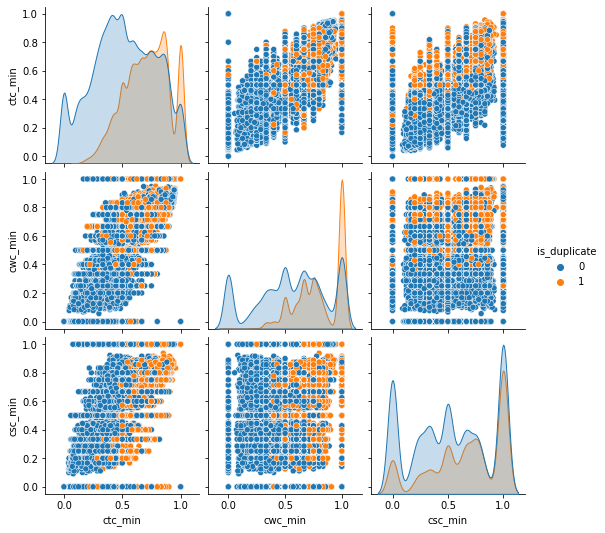

In [33]:
sns.pairplot(df[['ctc_min', 'cwc_min', 'csc_min', 'is_duplicate']],hue='is_duplicate')

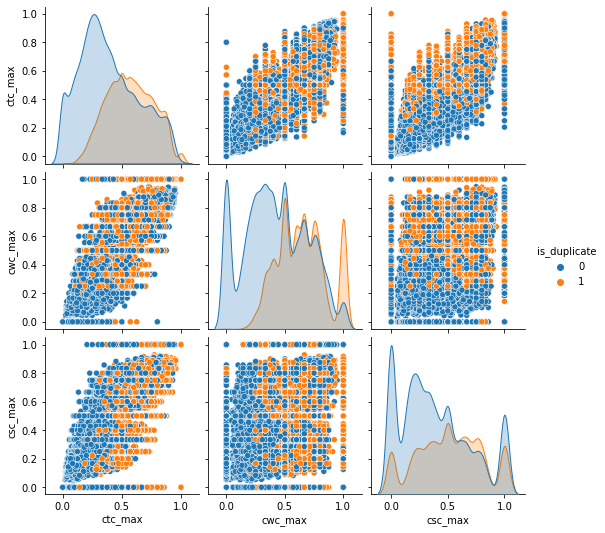

In [34]:
sns.pairplot(df[['ctc_max', 'cwc_max', 'csc_max', 'is_duplicate']],hue='is_duplicate')

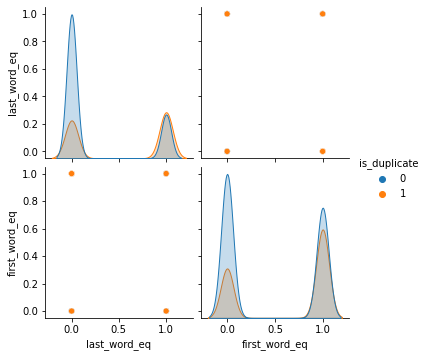

In [35]:
sns.pairplot(df[['last_word_eq', 'first_word_eq', 'is_duplicate']],hue='is_duplicate')

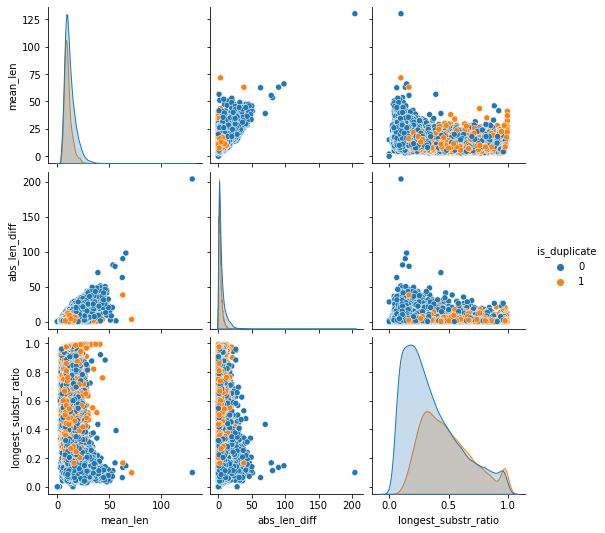

In [36]:
sns.pairplot(df[['mean_len', 'abs_len_diff','longest_substr_ratio', 'is_duplicate']],hue='is_duplicate')

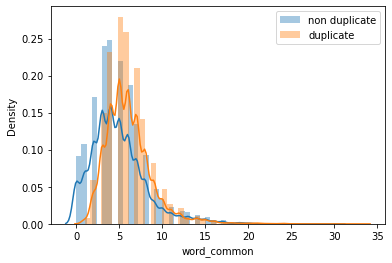

In [37]:
# common words
sns.distplot(df[df['is_duplicate'] == 0]['word_common'],label='non duplicate')
sns.distplot(df[df['is_duplicate'] == 1]['word_common'],label='duplicate')
plt.legend()
plt.show()

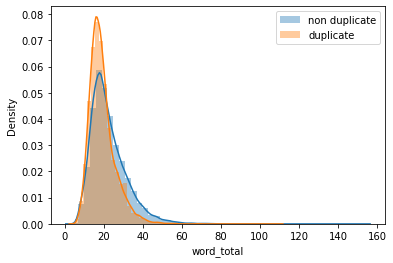

In [38]:
# total words
sns.distplot(df[df['is_duplicate'] == 0]['word_total'],label='non duplicate')
sns.distplot(df[df['is_duplicate'] == 1]['word_total'],label='duplicate')
plt.legend()
plt.show()

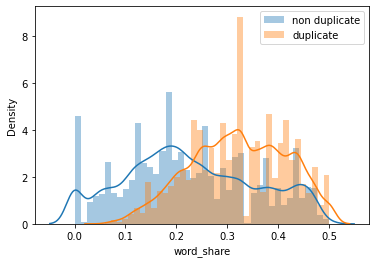

In [39]:
# word share
sns.distplot(df[df['is_duplicate'] == 0]['word_share'],label='non duplicate')
sns.distplot(df[df['is_duplicate'] == 1]['word_share'],label='duplicate')
plt.legend()
plt.show()

# Creating training data

In [40]:
ques_df = df[['question1','question2']]
ques_df.head()

,question1,question2
8067,how do i play pokémon go in korea,how do i play pokémon go in china
368101,what are some of the best side dish for crab cake,what are some good side dish for buffalo chicken
70497,which is more advis and better materi for a cr...,what is the best server setup for buddypress
226567,how do i improv logic program skill,how can i improv my logic skill for program
73186,how close we are to see 3rd world war,how close is a world war iii


In [41]:
final_df = df.drop(columns=['id','qid1','qid2','question1','question2'])
print(final_df.shape)
final_df.head()

(50000, 19)


,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words,word_common,word_total,word_share,cwc_min,cwc_max,csc_min,csc_max,ctc_min,ctc_max,last_word_eq,first_word_eq,abs_len_diff,mean_len,longest_substr_ratio
8067,0,33,33,8,8,7,16,0.44,0.749981,0.749981,0.999975,0.999975,0.874989,0.874989,0.0,1.0,0.0,8.0,0.823529
368101,0,49,48,11,9,6,20,0.30,0.399992,0.399992,0.999975,0.666656,0.666659,0.545450,0.0,1.0,2.0,10.0,0.306122
70497,0,84,44,16,8,2,24,0.08,0.000000,0.000000,0.499988,0.249997,0.249997,0.124999,0.0,0.0,8.0,12.0,0.111111
226567,1,35,43,7,9,6,16,0.38,0.999975,0.999975,0.666644,0.399992,0.857131,0.666659,0.0,1.0,2.0,8.0,0.277778
73186,1,37,28,9,7,4,16,0.25,0.749981,0.599988,0.333322,0.249994,0.571420,0.444440,0.0,1.0,2.0,8.0,0.344828


In [42]:
from sklearn.feature_extraction.text import TfidfVectorizer
# merge texts
questions = list(ques_df['question1']) + list(ques_df['question2'])

cv = TfidfVectorizer(max_features=3000)
q1_arr, q2_arr = np.vsplit(cv.fit_transform(questions).toarray(),2)

In [43]:
temp_df1 = pd.DataFrame(q1_arr, index= ques_df.index)
temp_df2 = pd.DataFrame(q2_arr, index= ques_df.index)
temp_df = pd.concat([temp_df1, temp_df2], axis=1)
temp_df.shape

(50000, 6000)

In [44]:
final_df = pd.concat([final_df, temp_df], axis=1)
print(final_df.shape)
final_df.head()

(50000, 6019)


,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words,word_common,word_total,word_share,cwc_min,cwc_max,...,2990,2991,2992,2993,2994,2995,2996,2997,2998,2999
8067,0,33,33,8,8,7,16,0.44,0.749981,0.749981,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
368101,0,49,48,11,9,6,20,0.30,0.399992,0.399992,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
70497,0,84,44,16,8,2,24,0.08,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
226567,1,35,43,7,9,6,16,0.38,0.999975,0.999975,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
73186,1,37,28,9,7,4,16,0.25,0.749981,0.599988,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [45]:
# final_df.to_csv('final_df.csv', index=False)

In [46]:
# final_df = pd.read_csv('final_df.csv')

In [47]:
final_df.head()

,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words,word_common,word_total,word_share,cwc_min,cwc_max,...,2990,2991,2992,2993,2994,2995,2996,2997,2998,2999
8067,0,33,33,8,8,7,16,0.44,0.749981,0.749981,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
368101,0,49,48,11,9,6,20,0.30,0.399992,0.399992,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
70497,0,84,44,16,8,2,24,0.08,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
226567,1,35,43,7,9,6,16,0.38,0.999975,0.999975,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
73186,1,37,28,9,7,4,16,0.25,0.749981,0.599988,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [48]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(final_df.iloc[:,1:].values,final_df.iloc[:,0].values,test_size=0.2,random_state=1)

In [49]:
X_train.shape

(40000, 6018)

In [50]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
rf = RandomForestClassifier()
rf.fit(X_train,y_train)
y_pred = rf.predict(X_test)
accuracy_score(y_test,y_pred)

0.7905

In [51]:
y_pred.shape

(10000,)

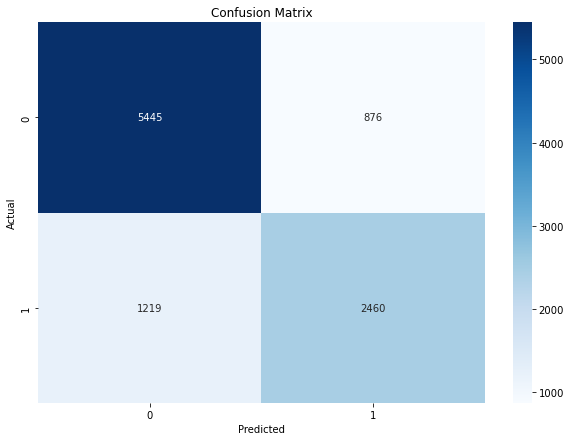

Precision: 0.7877674301735081
Recall: 0.7905
Accuracy: 0.7905
F1 Score: 0.788145206363722


In [52]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, precision_score, recall_score, accuracy_score, f1_score


cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='weighted')

print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'Accuracy: {accuracy}')
print(f'F1 Score: {f1}')


In [53]:
from xgboost import XGBClassifier
xgb = XGBClassifier()
xgb.fit(X_train,y_train)
y_pred = xgb.predict(X_test)
accuracy_score(y_test,y_pred)

0.7861

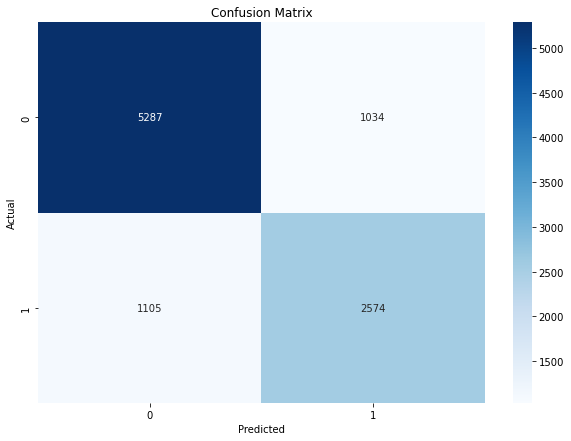

Precision: 0.7877674301735081
Recall: 0.7861
Accuracy: 0.7861
F1 Score: 0.7856552436980238


In [54]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, precision_score, recall_score, accuracy_score, f1_score


cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

recall = recall_score(y_test, y_pred, average='weighted')
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='weighted')

print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'Accuracy: {accuracy}')
print(f'F1 Score: {f1}')

In [58]:
import pickle

pickle.dump(rf, open('model.pkl', 'wb'))
pickle.dump(cv, open('cv.pkl','wb'))